In [25]:
#importing libs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
#display Image
def displayImg(img):
    plt.figure(figsize=(10.24,10.24))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    plt.show()

In [27]:
def angleInRadian(angle):
    return angle*np.pi/180

In [54]:
#Initialization
x_resolution=512
y_resolution=512
FOVx=FOVy=8
sigma=1.5#defocus level
#need to add more

# Mathmatical Modeling

1. Calc. of Rotational Mat. M

In [55]:
def getRotationalMat(alpha_0,delta_0,phi_0):
    """Gets the ascension, declination and role angle as inputs and return a rotational matrix"""
    a1=(np.sin(alpha_0)*np.cos(phi_0))-(np.cos(alpha_0)*np.sin(delta_0)*np.sin(phi_0))
    a2=(-np.sin(alpha_0)*np.sin(phi_0))-(np.cos(alpha_0)*np.sin(delta_0)*np.cos(phi_0))
    a3=-np.cos(alpha_0)*np.cos(delta_0)
    b1=(-np.cos(alpha_0)*np.cos(phi_0))-(np.sin(alpha_0)*np.sin(delta_0)*np.sin(phi_0))
    b2=(np.cos(alpha_0)*np.sin(phi_0))-(np.sin(alpha_0)*np.sin(delta_0)*np.cos(phi_0))
    b3=-np.sin(alpha_0)*np.cos(delta_0)
    c1=np.cos(alpha_0)*np.sin(phi_0)
    c2=np.cos(alpha_0)*np.cos(phi_0)
    c3=-np.sin(delta_0)
    M=np.array([
        [a1,a2,a3],
        [b1,b2,b3],
        [c1,c2,c3]
    ],dtype="float64")
    return M.transpose()

In [56]:
def obtainStarSensorCoordinateSystem(M_T,alpha_i,delta_i):
    """
    M_T=Transpose of orthogonal matrix. ie. Rotational Matrix
    alpha_i=ith ascension
    delta_i=ith declination
    """
    direction_vector_of_stars_in_celestial_coord_sys=np.array([
        [np.cos(alpha_i)*np.cos(delta_i)],
        [np.sin(alpha_i)*np.cos(delta_i)],
        [np.sin(delta_i)]
    ],dtype="float64")
    return np.matmul(M_T,direction_vector_of_stars_in_celestial_coord_sys)


# Condition stars ascension and declination in the cameras FOV frame

In [57]:
def checkStarsAlphaDeltaWithInFOV(alpha_i,delta_i,alpha_0,delta_0,FOVx,FOVy):
    """
    Takes stars position, camera position and FOV as input and checks whether
    stars position is within camera FOV frame
    If returns True, stars position is within FOV
    """
    R=np.sqrt((FOVx**2)+(FOVy**2))/2
    R=angleInRadian(R)
    rangeOfAlpha=np.array([alpha_0-(R/np.cos(delta_0)),alpha_0+(R/np.cos(delta_0))])
    rangeOfDelta=np.array([delta_0-R,delta_0+R])
    return np.logical_and(rangeOfAlpha[0]<alpha_i<rangeOfAlpha[1],rangeOfDelta[0]<delta_i<rangeOfDelta[1])
#checkStarsAlphaDeltaWithInFOV(
    

# Projection

In [74]:
def getPixelXY(res_x,res_y,sensor_coord_mat):
    fx=res_x/(2*np.tan(FOVx/2))
    fy=res_y/(2*np.tan(FOVy/2))
    proj_mat=np.array([
        [fx,0,res_x/2],
        [0,fy,res_y/2],
        [0,0,1]
    ])
    
    return np.matmul(proj_mat,sensor_coord_mat)+np.array([
        [res_x/2],
        [res_y/2],
        [0]
       ])

In [92]:
def getPixelXYAxis():
    pass

# Plotting star images from coordinates given in Hua-Ming Paper

In [76]:
stars_coords=np.array([
    [18.5318,16.1335,5.970],
    [23.9783,17.4337,5.910],
    [16.4240,21.4656,5.560],
    [23.7046,18.4604,5.916],
    [21.5636,19.1723,5.325],
    [ 21.6736,19.2404,5.494],
    [17.4549,19.6583,5.568],
    [20.8540,20.4691,5.971],
    [ 16.9881,20.7389,5.570],
    [17.8634,21.0346,4.660],
    [22.4703,18.3557,6.000]
])

In [77]:
M_T=getRotationalMat(angleInRadian(20),angleInRadian(20),angleInRadian(90))
M_T

array([[-3.21393805e-01, -1.16977778e-01,  9.39692621e-01],
       [-3.42020143e-01,  9.39692621e-01,  5.75395780e-17],
       [-8.83022222e-01, -3.21393805e-01, -3.42020143e-01]])

In [78]:
sensor_coords=[]
Mvs=[]
for i in stars_coords:
    if checkStarsAlphaDeltaWithInFOV(angleInRadian(i[0]),angleInRadian(i[1]),angleInRadian(20),angleInRadian(20),FOVx=FOVx,FOVy=FOVy):
        Mvs.append(i[2])
        sensor_coords.append(obtainStarSensorCoordinateSystem(M_T,i[0],i[1]))
print(sensor_coords)
print(Mvs)

[array([[-0.1431262 ],
       [ 0.56333293],
       [ 0.81373884]]), array([[-0.9319847 ],
       [-0.15397198],
       [ 0.32817244]]), array([[ 0.19526712],
       [ 0.31037057],
       [-0.93034448]]), array([[-0.29167124],
       [-0.90558963],
       [ 0.30795342]]), array([[0.52940619],
       [0.66468175],
       [0.52718807]]), array([[0.60652324],
       [0.57169923],
       [0.55253014]]), array([[ 0.72042329],
       [-0.68011053],
       [-0.13579374]]), array([[ 0.93716835],
       [-0.04855425],
       [-0.34548221]]), array([[ 0.82847196],
       [ 0.25125787],
       [-0.50050344]]), array([[ 0.81393204],
       [ 0.56042555],
       [-0.1530942 ]]), array([[-0.1468292 ],
       [-0.11421908],
       [ 0.98254526]])]
[5.97, 5.91, 5.56, 5.916, 5.325, 5.494, 5.568, 5.971, 5.57, 4.66, 6.0]


# Projection to pixels

In [79]:
pixels=[]
for i in sensor_coords:
    pixels.append(getPixelXY(x_resolution,y_resolution,i).reshape(3)[:2])
pixels

[array([432.671235  , 588.87283452]),
 array([133.94572656, 305.96817908]),
 array([61.0063359 , 86.45627811]),
 array([270.34612611, 134.6057396 ]),
 array([508.01446546, 537.92456093]),
 array([531.55299674, 523.8532362 ]),
 array([380.52594776,  70.86100622]),
 array([374.76910186, 156.82096958]),
 array([311.05035829, 183.42547428]),
 array([396.77227562, 340.72074036]),
 array([475.06692544, 482.27718408])]

In reality, the optical lens cannot achieve perfect persective imaging but has different degrees of distortion. As the reason, the image  is not exactly at (X,Y).
{X'=X+dx,Y'=Y+dy<br>
dx and dy are distortion value

# The composition of the Digital Star Image
A Point Spreading Function(PSF) is used to simulate the spreading of the light upon multiple pizels

In [81]:
def psfGaussianDistribution(x,y,Mv):
    k1=1000
    k2=k3=1
    H=k1*np.exp(-k2*Mv+k3)
    num=np.exp(-((x**2)+(y**2))/(2*(sigma**2)),dtype="float128")
    den=2*3.14*(sigma**2)
    return H*num/den
def Add_Noise(image,noiseLevel):
    noise=np.random.normal(0,noiseLevel,size=(x_resolution,y_resolution))
    return image+noise
    

(512, 512)


/tmp/ipykernel_43225/386644384.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


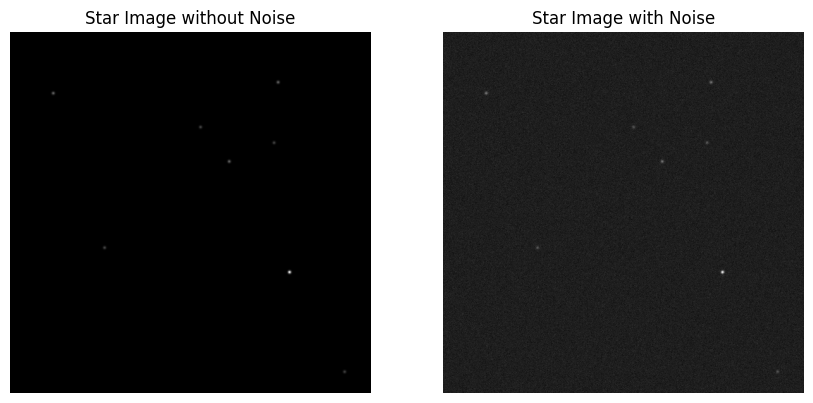

In [82]:
# Calculate Gaussian PSF
# Create grid of coordinates
x = np.linspace(0,x_resolution,y_resolution)
y = np.linspace(0,x_resolution,y_resolution)
X, Y = np.meshgrid(x, y)
noiseLevel=0.05
# Calculate PSF values
PSF=np.zeros_like(Y)
for i in range(len(pixels)):
    PSF +=psfGaussianDistribution(X-pixels[i][0],Y-pixels[i][1],Mvs[i])#gaussian_psf(X - X_points[i], Y - Y_points[i])

print(PSF.shape)
# Display PSF as an image
fig,ax=plt.subplots(1,2,figsize=(10.24,10.24))
ax[0].imshow(PSF,cmap="gray")
ax[1].imshow(Add_Noise(PSF,noiseLevel),cmap="gray")
ax[0].axis('off')
ax[1].axis('off')
ax[0].set_title('Star Image without Noise')
ax[1].set_title("Star Image with Noise")
fig.show()
fig.savefig("../Media/StarImageComparison.png")


# Loading NPZ File

In [77]:
#!pip install pandas

In [41]:
import pandas as pd
import numpy as np
data=np.load("../Custom Catalog/data.npz")
data

NpzFile '../Custom Catalog/data.npz' with keys: star_table, pattern_catalog, props_packed, pattern_largest_edge, star_catalog_IDs

In [88]:
df=pd.DataFrame(data["star_table"],columns=["RA","DEC","COSCOS","SINCOS","SIN","MV"])
df.drop(columns=["COSCOS","SINCOS","SIN"],inplace=True)
df

,RA,DEC,MV
0,1.767731,-0.291888,-1.44
1,1.675310,-0.919710,-0.62
2,3.733397,0.334573,-0.05
3,3.837173,-1.061699,-0.01
4,4.873594,0.676935,0.03
...,...,...,...
3977,3.378553,-0.203305,6.00
3978,2.702827,0.844671,6.00
3979,0.573209,-0.175462,6.00
3980,2.184595,1.263742,6.00


In [124]:
star_coords_in_array=df.to_numpy()
star_coords_in_array

array([[ 1.7677308 , -0.29188764, -1.44      ],
       [ 1.6753095 , -0.91971016, -0.62      ],
       [ 3.7333972 ,  0.33457327, -0.05      ],
       ...,
       [ 0.5732086 , -0.17546241,  6.        ],
       [ 2.1845946 ,  1.2637419 ,  6.        ],
       [ 3.1895683 ,  1.4261054 ,  6.        ]], dtype=float32)

# Plotting given star table

In [125]:
#Initialization
x_resolution=1024
y_resolution=1024
FOVx=FOVy=50
sigma=1.5#defocus level
#need to add more

In [126]:
M_T=getRotationalMat(angleInRadian(10),angleInRadian(10),angleInRadian(90))
M_T

array([[-1.71010072e-01, -3.01536896e-02,  9.84807753e-01],
       [-1.73648178e-01,  9.84807753e-01,  6.03020831e-17],
       [-9.69846310e-01, -1.71010072e-01, -1.73648178e-01]])

In [127]:
sensor_coords_in_array=[]
Mvs=[]
for i in star_coords_in_array:
    if checkStarsAlphaDeltaWithInFOV(i[0],i[1],angleInRadian(10),angleInRadian(10),FOVx=FOVx,FOVy=FOVy):
        Mvs.append(i[2])
        sensor_coords_in_array.append(obtainStarSensorCoordinateSystem(M_T,i[0],i[1]))
print(sensor_coords_in_array)
print(Mvs)

[array([[ 0.24417796],
       [ 0.34058717],
       [-0.90795235]]), array([[-0.46924156],
       [ 0.01492216],
       [-0.88294373]]), array([[ 0.43358462],
       [ 0.10518173],
       [-0.89495323]]), array([[ 0.32848381],
       [-0.12013928],
       [-0.93683772]]), array([[ 0.54329273],
       [ 0.26463725],
       [-0.79674342]]), array([[-0.07066052],
       [ 0.58021362],
       [-0.81139345]]), array([[ 0.19604048],
       [ 0.29909521],
       [-0.93386839]]), array([[ 0.09148798],
       [-0.11244738],
       [-0.98943694]]), array([[ 0.43313572],
       [ 0.31203346],
       [-0.84559356]]), array([[ 0.35609438],
       [-0.00250441],
       [-0.93444666]]), array([[ 0.34269228],
       [ 0.27265154],
       [-0.89901231]]), array([[-0.3436935 ],
       [ 0.12248743],
       [-0.93105937]]), array([[-0.09330941],
       [ 0.51158951],
       [-0.85414848]]), array([[-0.43083157],
       [ 0.26513944],
       [-0.86260373]]), array([[-0.32197404],
       [-0.08858276],
   

In [128]:
pixels=[]
for i in sensor_coords_in_array:
    pixels.append(getPixelXY(x_resolution,y_resolution,i).reshape(3)[:2])
pixels

[array([ -889.15918771, -1258.83522677]),
 array([1859.21496143,    2.71457592]),
 array([-1608.77352967,  -349.52986683]),
 array([-1227.21486029,   493.00686255]),
 array([-1979.16010207,  -910.67027527]),
 array([  367.51059808, -2128.23210918]),
 array([ -717.84753484, -1113.0054817 ]),
 array([-345.3975513 ,  436.58186051]),
 array([-1581.78010107, -1117.41984254]),
 array([-1331.8619052 ,    43.16634998]),
 array([-1262.32987151,  -993.76233872]),
 array([1353.17228538, -434.37400538]),
 array([  432.46600858, -1886.98715883]),
 array([1722.34793419, -946.31638287]),
 array([1263.98378443,  369.05717334]),
 array([1219.28056705, -689.79288886]),
 array([-1137.13695118, -1738.0196165 ]),
 array([-358.9314354 , -809.25365484]),
 array([ 1356.76407545, -1101.42282875]),
 array([  476.83282136, -1306.03000003]),
 array([-1767.90962462,  -156.13943389]),
 array([ -620.27794244, -1110.34802702]),
 array([ 1242.1524487 , -2010.97328186]),
 array([ 2043.75122105, -1121.9700627 ]),
 array

(1024, 1024)


/tmp/ipykernel_43225/386644384.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


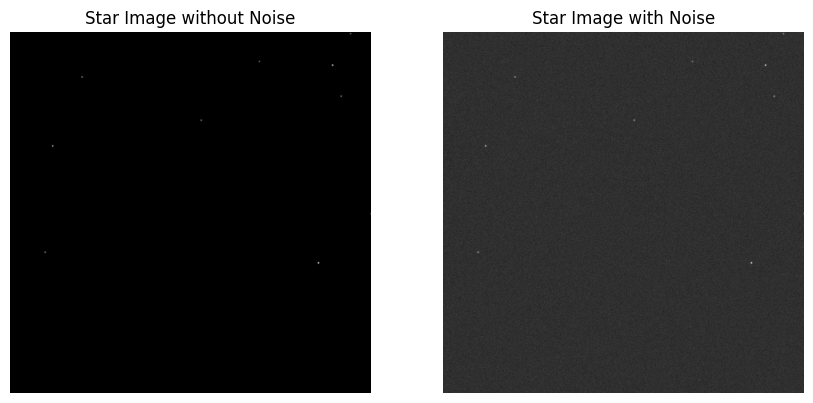

In [129]:
# Calculate Gaussian PSF
# Create grid of coordinates
x = np.linspace(0,x_resolution,y_resolution)
y = np.linspace(0,x_resolution,y_resolution)
X, Y = np.meshgrid(x, y)
noiseLevel=0.05
# Calculate PSF values
PSF=np.zeros_like(Y)
for i in range(len(pixels)):
    PSF +=psfGaussianDistribution(X-pixels[i][0],Y-pixels[i][1],Mvs[i])#gaussian_psf(X - X_points[i], Y - Y_points[i])

print(PSF.shape)
# Display PSF as an image
fig,ax=plt.subplots(1,2,figsize=(10.24,10.24))
ax[0].imshow(PSF,cmap="gray")
ax[1].imshow(Add_Noise(PSF,noiseLevel),cmap="gray")
ax[0].axis('off')
ax[1].axis('off')
ax[0].set_title('Star Image without Noise')
ax[1].set_title("Star Image with Noise")
fig.show()
fig.savefig("../Media/StarImageComparison_starTable.png")
